# Task-5-Exploratory Data Analysis (Sports)

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')

In [226]:
df=pd.read_csv("ipl/matches.csv")
df1=pd.read_csv("ipl/deliveries.csv")

In [227]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [228]:
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [230]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [231]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [232]:
df1.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [233]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [234]:
df=df.drop(columns=['umpire3'],axis=1)

In [235]:
df.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

In [236]:
df1.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [237]:
df1=df1.drop(columns=['player_dismissed','dismissal_kind','fielder'],axis=1)

In [238]:
df1.isnull().sum()

match_id         0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
extra_runs       0
total_runs       0
dtype: int64

In [239]:
s=df['season'].unique()
s

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

### Teams with most wins

In [240]:
team_win=df.groupby('season')['winner'].value_counts()
season_win=pd.DataFrame(columns=['year','team','wins'])
year=2008
for i in team_win.iteritems():
    if i[0][0]==year:
        wins= pd.DataFrame({
            'year': [i[0][0]],
            'team': [i[0][1]],
            'wins': [i[1]]
        })
        season_win = season_win.append(wins)
        year= year+1  

In [241]:
season_win

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


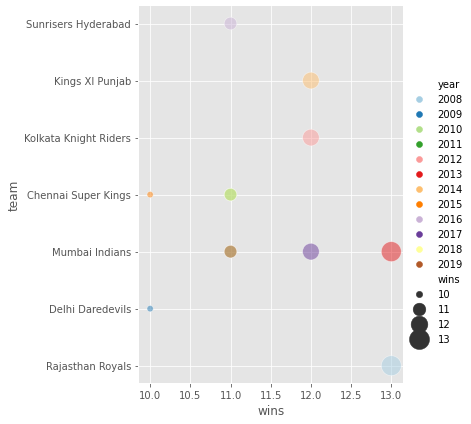

In [242]:
sns.relplot(x="wins", y="team", hue='year', size="wins", sizes=(40, 400), alpha=.5, palette="Paired",height=6, data=season_win)

### Most successful IPL Teams

In [243]:
most_win=df['winner'].value_counts()
most_win1 = pd.DataFrame(columns=["team", "wins"])
for items in most_win.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    most_win1 = most_win1.append(temp_df1, ignore_index=True)

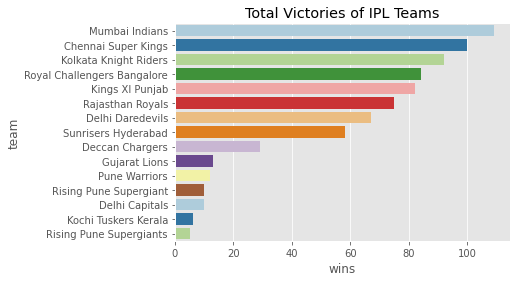

In [244]:
plt.title("Total Victories of IPL Teams")
sns.barplot(x='wins', y='team', data=most_win1, palette='Paired');

### Best Player

In [245]:
best_p=df['player_of_match'].value_counts()
best_p1=pd.DataFrame(columns=["player","wins"])
count=0
for i in best_p.iteritems():
    if count>11:
        break;
    else:
        temp_df1=pd.DataFrame({
            "player":[i[0]],
            "wins":[i[1]]
    })
    best_p1=best_p1.append(temp_df1)
    count=count+1

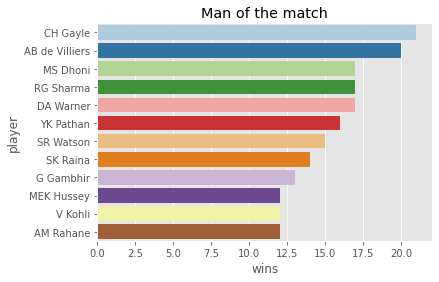

In [246]:
plt.title("Man of the match")
sns.barplot(x='wins', y='player', data=best_p1, palette='Paired');

### Factors contributing to win and loss of a Team
1. Venue
2. Performance of the team 

#### 1. Venue

In [289]:
venue=df['city'].value_counts()
venue1=pd.DataFrame(columns=['city','no. of matches'])
for items in venue.iteritems():
    temp_df1=pd.DataFrame({
            "city":[items[0]],
            "no. of matches":[items[1]]
    })
    venue1=venue1.append(temp_df1)
venue1

,city,no. of matches
0,Mumbai,101
0,Kolkata,77
0,Delhi,74
0,Bangalore,66
0,Hyderabad,64
0,Chennai,57
0,Jaipur,47
0,Chandigarh,46
0,Pune,38
0,Durban,15


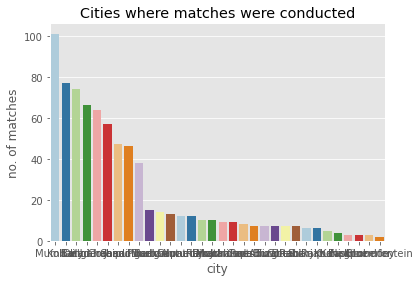

In [271]:
plt.title("Cities where matches were conducted")
sns.barplot(x='city', y='no. of matches', data=venue1, palette='Paired');

#### 2. Performance of the Team
1. Teams that wins by wickets
2. Teams that win by runs
3. Player with most wide runs
4. Probablity of winning the match if won the Toss

In [298]:
wick=df['win_by_wickets'].value_counts()
wick1=pd.DataFrame(columns=['wickets','matches'])
for i in wick.iteritems():
    temp_df1=pd.DataFrame({
        "wickets":[i[0]],
        "matches":[i[1]]
    })
    wick1=wick1.append(temp_df1,ignore_index=True)
wick1

,wickets,matches
0,0,350
1,6,85
2,7,80
3,5,71
4,8,54
5,4,41
6,9,37
7,3,18
8,10,11
9,2,6


In [250]:
for i, j in df.iterrows():
    print(i,j)

0 id                                                         1
season                                                  2017
city                                               Hyderabad
date                                              2017-04-05
team1                                    Sunrisers Hyderabad
team2                            Royal Challengers Bangalore
toss_winner                      Royal Challengers Bangalore
toss_decision                                          field
result                                                normal
dl_applied                                                 0
winner                                   Sunrisers Hyderabad
win_by_runs                                               35
win_by_wickets                                             0
player_of_match                                 Yuvraj Singh
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                          AY Dandekar
umpire2               

52 id                                    53
season                              2017
city                             Kolkata
date                          2017-05-13
team1                     Mumbai Indians
team2              Kolkata Knight Riders
toss_winner        Kolkata Knight Riders
toss_decision                      field
result                            normal
dl_applied                             0
winner                    Mumbai Indians
win_by_runs                            9
win_by_wickets                         0
player_of_match                AT Rayudu
venue                       Eden Gardens
umpire1                   A Nand Kishore
umpire2                           S Ravi
Name: 52, dtype: object
53 id                                                      54
season                                                2017
city                                                  Pune
date                                            2017-05-14
team1                                

Name: 101, dtype: object
102 id                                   103
season                              2008
city                             Kolkata
date                          2008-05-18
team1              Kolkata Knight Riders
team2                Chennai Super Kings
toss_winner        Kolkata Knight Riders
toss_decision                        bat
result                            normal
dl_applied                             1
winner               Chennai Super Kings
win_by_runs                            3
win_by_wickets                         0
player_of_match                  M Ntini
venue                       Eden Gardens
umpire1                        Asad Rauf
umpire2                      K Hariharan
Name: 102, dtype: object
103 id                                         104
season                                    2008
city                                 Bangalore
date                                2008-05-19
team1              Royal Challengers Bangalore
team2     

153 id                                   154
season                              2009
city                        Johannesburg
date                          2009-05-10
team1              Kolkata Knight Riders
team2                   Delhi Daredevils
toss_winner             Delhi Daredevils
toss_decision                      field
result                            normal
dl_applied                             0
winner                  Delhi Daredevils
win_by_runs                            0
win_by_wickets                         7
player_of_match                 A Mishra
venue              New Wanderers Stadium
umpire1                       SL Shastri
umpire2                        RB Tiffin
Name: 153, dtype: object
154 id                                   155
season                              2009
city                           Kimberley
date                          2009-05-11
team1                    Deccan Chargers
team2                   Rajasthan Royals
toss_winner             

Name: 209, dtype: object
210 id                                             211
season                                        2010
city                                       Chennai
date                                    2010-04-06
team1                          Chennai Super Kings
team2                               Mumbai Indians
toss_winner                    Chennai Super Kings
toss_decision                                  bat
result                                      normal
dl_applied                                       0
winner                         Chennai Super Kings
win_by_runs                                     24
win_by_wickets                                   0
player_of_match                           SK Raina
venue              MA Chidambaram Stadium, Chepauk
umpire1                                   S Asnani
umpire2                                  DJ Harper
Name: 210, dtype: object
211 id                                    212
season                           

Name: 261, dtype: object
262 id                                         263
season                                    2011
city                                     Delhi
date                                2011-04-26
team1                         Delhi Daredevils
team2              Royal Challengers Bangalore
toss_winner        Royal Challengers Bangalore
toss_decision                            field
result                                  normal
dl_applied                                   0
winner             Royal Challengers Bangalore
win_by_runs                                  0
win_by_wickets                               3
player_of_match                        V Kohli
venue                         Feroz Shah Kotla
umpire1                               S Asnani
umpire2                              RJ Tucker
Name: 262, dtype: object
263 id                                        264
season                                   2011
city                                   Mumbai
date 

Name: 335, dtype: object
336 id                                   337
season                              2012
city                             Cuttack
date                          2012-04-22
team1                    Deccan Chargers
team2              Kolkata Knight Riders
toss_winner        Kolkata Knight Riders
toss_decision                      field
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         5
player_of_match                    B Lee
venue                   Barabati Stadium
umpire1                        BF Bowden
umpire2                      SK Tarapore
Name: 336, dtype: object
337 id                                         338
season                                    2012
city                                    Jaipur
date                                2012-04-23
team1              Royal Challengers Bangalore
team2     

395 id                                             396
season                                        2013
city                                       Chennai
date                                    2013-04-13
team1                  Royal Challengers Bangalore
team2                          Chennai Super Kings
toss_winner                    Chennai Super Kings
toss_decision                                field
result                                      normal
dl_applied                                       0
winner                         Chennai Super Kings
win_by_runs                                      0
win_by_wickets                                   4
player_of_match                          RA Jadeja
venue              MA Chidambaram Stadium, Chepauk
umpire1                                  Asad Rauf
umpire2                               AK Chaudhary
Name: 395, dtype: object
396 id                                   397
season                              2013
city              

Name: 465, dtype: object
466 id                                                 467
season                                            2014
city                                               NaN
date                                        2014-04-23
team1                              Chennai Super Kings
team2                                 Rajasthan Royals
toss_winner                           Rajasthan Royals
toss_decision                                    field
result                                          normal
dl_applied                                           0
winner                             Chennai Super Kings
win_by_runs                                          7
win_by_wickets                                       0
player_of_match                              RA Jadeja
venue              Dubai International Cricket Stadium
umpire1                                HDPK Dharmasena
umpire2                                 RK Illingworth
Name: 466, dtype: object
467 id     

536 id                                                               537
season                                                          2015
city                                                   Visakhapatnam
date                                                      2015-04-22
team1                                            Sunrisers Hyderabad
team2                                          Kolkata Knight Riders
toss_winner                                    Kolkata Knight Riders
toss_decision                                                  field
result                                                        normal
dl_applied                                                         1
winner                                           Sunrisers Hyderabad
win_by_runs                                                       16
win_by_wickets                                                     0
player_of_match                                            DA Warner
venue              Dr. Y.S. Ra

Name: 644, dtype: object
645 id                                  7903
season                              2018
city                             Kolkata
date                            14/04/18
team1              Kolkata Knight Riders
team2                Sunrisers Hyderabad
toss_winner          Sunrisers Hyderabad
toss_decision                      field
result                            normal
dl_applied                             0
winner               Sunrisers Hyderabad
win_by_runs                            0
win_by_wickets                         5
player_of_match               B Stanlake
venue                       Eden Gardens
umpire1                  A Nanda Kishore
umpire2                   Anil Chaudhary
Name: 645, dtype: object
646 id                                        7904
season                                    2018
city                                 Bengaluru
date                                  15/04/18
team1                         Rajasthan Royals
team2     

Name: 701, dtype: object
702 id                                       11143
season                                    2019
city                                 Bengaluru
date                                  28/03/19
team1                           Mumbai Indians
team2              Royal Challengers Bangalore
toss_winner        Royal Challengers Bangalore
toss_decision                            field
result                                  normal
dl_applied                                   0
winner                          Mumbai Indians
win_by_runs                                  6
win_by_wickets                               0
player_of_match                      JJ Bumrah
venue                   M. Chinnaswamy Stadium
umpire1                                 S Ravi
umpire2                               O Nandan
Name: 702, dtype: object
703 id                                              11144
season                                           2019
city                               

737 id                                       11333
season                                    2019
city                                 Bengaluru
date                                  24/04/19
team1              Royal Challengers Bangalore
team2                          Kings XI Punjab
toss_winner                    Kings XI Punjab
toss_decision                            field
result                                  normal
dl_applied                                   0
winner             Royal Challengers Bangalore
win_by_runs                                 17
win_by_wickets                               0
player_of_match                 AB de Villiers
venue                   M. Chinnaswamy Stadium
umpire1                         Bruce Oxenford
umpire2                          C Shamshuddin
Name: 737, dtype: object
738 id                                 11334
season                              2019
city                             Kolkata
date                            25/04/19
team

In [251]:
for i, j in df.iterrows():
    if(j['win_by_wickets']==10):
        print(j)

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
Name: 2, dtype

In [252]:
run=df['win_by_runs'].value_counts()
run.sort_values(ascending=True)

146      1
98       1
77       1
93       1
102      1
      ... 
1       10
10      11
4       11
14      13
0      419
Name: win_by_runs, Length: 89, dtype: int64

In [253]:
for i,j in df.iterrows():
    if(j['win_by_runs']>100):
        print(j)

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object
id                                          60
season                                    2008
city                                 Bangalore
date                                2008-04-18
team1                    Kolkata Knight Riders
team2              Royal Challengers Bangalore
toss_winner        Royal Challengers Bangalore
toss_decision                      

### Player with most wide runs

In [261]:
bat=df1['wide_runs'].value_counts()
for i,j in bat.iteritems():
    print("Number of wide balls: "+str(i)+" and the count is: "+str(j))

Number of wide balls: 0 and the count is: 173673
Number of wide balls: 1 and the count is: 4915
Number of wide balls: 2 and the count is: 230
Number of wide balls: 5 and the count is: 208
Number of wide balls: 3 and the count is: 47
Number of wide balls: 4 and the count is: 5


In [295]:
wr=df1['wide_runs'].value_counts()
wr1=pd.DataFrame(columns=['wide balls','no. of wide balls'])
for items in wr.iteritems():
    temp_df1=pd.DataFrame({
            "wide balls":[items[0]],
            "no. of wide balls":[items[1]]
    })
    wr1=wr1.append(temp_df1, ignore_index=True)
wr1=wr1.drop(wr1.index[0])

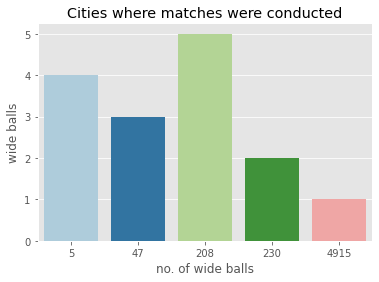

In [296]:
plt.title("Cities where matches were conducted")
sns.barplot(x='no. of wide balls', y='wide balls', data=wr1, palette='Paired');

In [279]:
print("The bowler with highest number of wide balls are: ")
for i,j in df1.iterrows():
    if(j['wide_runs']==5):
        print(str(j['bowler']))

The bowler with highest number of wide balls are: 
SB Jakati
SP Narine
MC Henriques
SL Malinga
Mohammed Shami
K Rabada
TS Mills
SN Thakur
SP Narine
AA Noffke
D Salunkhe
SB Bangar
A Symonds
VS Yeligati
AB Dinda
I Sharma
Mohammad Hafeez
A Kumble
S Sreesanth
JA Morkel
M Muralitharan
PP Chawla
PP Ojha
DR Smith
P Kumar
PP Chawla
LR Shukla
JH Kallis
Abdur Razzak
PJ Sangwan
Z Khan
SD Chitnis
S Sreesanth
DW Steyn
I Sharma
A Kumble
CH Gayle
AM Salvi
JH Kallis
I Sharma
KP Pietersen
JP Duminy
SM Harwood
BJ Hodge
RR Raje
WPUJC Vaas
J Botha
DS Kulkarni
M Kartik
ST Jayasuriya
SW Tait
MF Maharoof
ST Jayasuriya
L Balaji
PP Ojha
Harbhajan Singh
PP Chawla
B Lee
Harmeet Singh
JH Kallis
B Lee
RS Bopara
SL Malinga
AN Ahmed
RJ Harris
A Kumble
BAW Mendis
RR Powar
RR Powar
DS Kulkarni
JA Morkel
M Muralitharan
CH Gayle
CH Gayle
L Balaji
Pankaj Singh
AG Murtaza
P Kumar
SB Jakati
SL Malinga
R Ashwin
AUK Pathan
WD Parnell
B Lee
WD Parnell
Harmeet Singh
DE Bollinger
Z Khan
SJ Srivastava
RJ Harris
KA Pollard
AB Din

### Probablity of winning the match if won the Toss

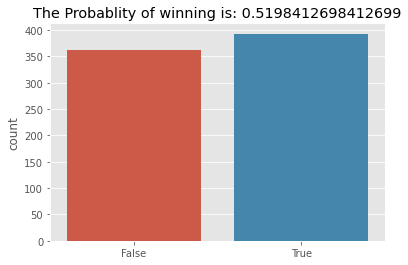

In [277]:
winner=df['toss_winner']==df['winner']
win=0
for i,j in df.iterrows():
    if(j['toss_winner']==j['winner']):
        win=win+1
prob=win/len(df)
plt.title("The Probablity of winning is: " +str(prob))
sns.countplot(winner)